# Import modules

In [1]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

In [2]:
print("Working directory:", os.getcwd())

Working directory: c:\Users\benjo\OneDrive\Data Science Masters\DSMP\dsmp-2024-group-19


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tools import read_merged_data
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
random_state = 42
np.random.seed(random_state)

# Load Data

In [4]:
merged_data = read_merged_data(124)
merged_df = pd.concat(merged_data, axis = 0)
merged_df.head()

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv
Opening UoB_Set01_2025-01-06tapes.csv
Opening UoB_Set01_2025-01-07tapes.csv
Opening UoB_Set01_2025-01-08tapes.csv
Opening UoB_Set01_2025-01-09tapes.csv
Opening UoB_Set01_2025-01-10tapes.csv
Opening UoB_Set01_2025-01-13tapes.csv
Opening UoB_Set01_2025-01-14tapes.csv
Opening UoB_Set01_2025-01-15tapes.csv
Opening UoB_Set01_2025-01-16tapes.csv
Opening UoB_Set01_2025-01-17tapes.csv
Opening UoB_Set01_2025-01-20tapes.csv
Opening UoB_Set01_2025-01-21tapes.csv
Opening UoB_Set01_2025-01-22tapes.csv
Opening UoB_Set01_2025-01-23tapes.csv
Opening UoB_Set01_2025-01-24tapes.csv
Opening UoB_Set01_2025-01-27tapes.csv
Opening UoB_Set01_2025-01-28tapes.csv
Opening UoB_Set01_2025-01-29tapes.csv
Opening UoB_Set01_2025-01-30tapes.csv
Opening UoB_Set01_2025-01-31tapes.csv
Opening UoB_Set01_2025-02-03tapes.csv
Opening UoB_Set01_2025-02-04tapes.csv
Opening UoB_Set01_2025-02-05tapes.csv
Opening UoB_Set01_2025-02-06tapes.csv
Opening UoB_

,Incoming bid,Incoming ask,Outgoing bid,Outgoing ask,alpha,beta,LOB,mid_price,low_ask,high_bid,Volume,Tapes Price,Last Tapes Price
combined_time,,,,,,,,,,,,,
2025-01-02 08:00:00,[1 6],,,,NaN,NaN,"[['bid', [[1, 6]]], ['ask', []]]",NaN,NaN,1.0,NaN,NaN,NaN
2025-01-02 08:00:01,[261 1],[800 1][799 1][798 1][797 1],,[800 1][799 1][798 1],0.002986,0.015020,"[['bid', [[261, 1], [1, 6]]], ['ask', [[797, 1...",529.0,797.0,261.0,NaN,NaN,NaN
2025-01-02 08:00:02,[262 6],[338 3][297 5],[1 6],,0.238553,0.165031,"[['bid', [[262, 6], [261, 1]]], ['ask', [[297,...",279.5,297.0,262.0,NaN,NaN,NaN
2025-01-02 08:00:03,[263 6][264 6],[296 1][309 3][334 4][292 5][291 1][296 4],[262 6][263 6],[338 3][297 5][797 1][296 1] [309 3],0.524854,0.429582,"[['bid', [[264, 6], [261, 1]]], ['ask', [[291,...",277.5,291.0,264.0,NaN,NaN,NaN
2025-01-02 08:00:04,,[288 5][307 4][287 1] [296 3][287 4][300 4][28...,,[292 5][334 4][296 4][287 1] [296 3][307 4][29...,0.820913,0.541382,"[['bid', [[264, 6], [261, 1]]], ['ask', [[286,...",275.0,286.0,264.0,NaN,NaN,NaN


In [5]:
merged_df["zeta"] = merged_df["alpha"] - merged_df["beta"]
merged_df["spread"] = merged_df["low_ask"] - merged_df["high_bid"]
merged_df["gap"] = merged_df["mid_price"] - merged_df["Last Tapes Price"]

# Prepare Samples

In [6]:
def generate_sample(day, day_index, rnd, sizings, sample_index, sampling_rate) -> pd.DataFrame:
    train_start_time = day.index[rnd] # when referencing start <= segment < end
    train_end_time = day.index[rnd + sizings[0]]
    test_end_time1 = day.index[rnd + sizings[1]]
    test_end_time2 = day.index[rnd + sizings[2]]
    test_end_time3 = day.index[rnd + sizings[3]]
    row = {"sample_index": sample_index,
           "train_size (s)": sizings[0],
           "day_index": day_index,
           "train_start_time": train_start_time,
           "train_end_time": train_end_time,
           "test_end_time1": test_end_time1,
           "test_end_time2": test_end_time2,
           "test_end_time3": test_end_time3,
           "sampling_rate (s)": sampling_rate}
    row = pd.DataFrame([row])
    return row

# extract intra day segments
# train/test size

sample_index = 0
indicies = pd.DataFrame()
for i, d in enumerate(merged_data):
    print(i, end = "\r")
    N = len(d)
    # random samples (3 each)

    for _ in range(10):
        # 1 min / 1s,10s,20s - (60,61,70,80)
        sizings = (60,61,70,80)
        row = generate_sample(d, i, np.random.randint(0,N - sizings[3]), sizings, sample_index, 1)
        indicies = pd.concat([indicies, row], axis = 0)
        sample_index += 1

        
        # 12 min / 12s,2min,4min
        sizings = (12*60, 12*60+12, 14*60, 16*60)
        row = generate_sample(d, i, np.random.randint(0,N - sizings[3]), sizings, sample_index, 1)
        indicies = pd.concat([indicies, row], axis = 0)
        sample_index += 1

        # 60 min / 1min,10min,20min
        sizings = (60*60, 61*60, 70*60, 80*60)
        row = generate_sample(d, i, np.random.randint(0,N - sizings[3]), sizings, sample_index, 2)
        indicies = pd.concat([indicies, row], axis = 0)
        sample_index += 1

    # fixed samples
    # 3hr / 3min,30min,1hr
    # start_times = (8:00, 10:15, 12:30)
    sizings = (60*60*3, 60*60*3 + 3*60, 60*60*3 + 30*60, 60*60*4)
    row = generate_sample(d, i, 0, sizings, sample_index, 5) # 8:00
    indicies = pd.concat([indicies, row], axis = 0)
    sample_index += 1

    sizings = (60*60*3, 60*60*3 + 3*60, 60*60*3 + 30*60, 60*60*4)
    row = generate_sample(d, i, 15*60*9, sizings, sample_index, 5) # 10:15
    indicies = pd.concat([indicies, row], axis = 0)
    sample_index += 1

    sizings = (60*60*3, 60*60*3 + 3*60, 60*60*3 + 30*60, 60*60*4)
    row = generate_sample(d, i, 30*60*9 - 1, sizings, sample_index, 5) # 12:30
    indicies = pd.concat([indicies, row], axis = 0)
    sample_index += 1

indicies.index = indicies["sample_index"]
indicies.drop("sample_index", axis = 1, inplace=True)
indicies

,train_size (s),day_index,train_start_time,train_end_time,test_end_time1,test_end_time2,test_end_time3,sampling_rate (s)
sample_index,,,,,,,,
0,60,0,2025-01-02 14:34:14,2025-01-02 14:35:14,2025-01-02 14:35:15,2025-01-02 14:35:24,2025-01-02 14:35:34,1
1,720,0,2025-01-02 12:23:15,2025-01-02 12:35:15,2025-01-02 12:35:27,2025-01-02 12:37:15,2025-01-02 12:39:15,1
2,3600,0,2025-01-02 08:14:20,2025-01-02 09:14:20,2025-01-02 09:15:20,2025-01-02 09:24:20,2025-01-02 09:34:20,2
3,60,0,2025-01-02 09:29:50,2025-01-02 09:30:50,2025-01-02 09:30:51,2025-01-02 09:31:00,2025-01-02 09:31:10,1
4,720,0,2025-01-02 13:59:35,2025-01-02 14:11:35,2025-01-02 14:11:47,2025-01-02 14:13:35,2025-01-02 14:15:35,1
...,...,...,...,...,...,...,...,...
4120,720,124,2025-07-01 14:13:53,2025-07-01 14:25:53,2025-07-01 14:26:05,2025-07-01 14:27:53,2025-07-01 14:29:53,1
4121,3600,124,2025-07-01 08:18:09,2025-07-01 09:18:09,2025-07-01 09:19:09,2025-07-01 09:28:09,2025-07-01 09:38:09,2
4122,10800,124,2025-07-01 08:00:00,2025-07-01 11:00:00,2025-07-01 11:03:00,2025-07-01 11:30:00,2025-07-01 12:00:00,5


# 60min

In [7]:
sixty_df = pd.DataFrame()

def y_score(diff):
    if abs(diff) < 0.001:
        return 0
    elif diff > 0:
        return 1
    else:
        return -1

for i, row in indicies[indicies["train_size (s)"] == 3600].iterrows():
    print(i, end = "\r")
    segment = merged_df[(merged_df.index >= row["train_start_time"]) & (merged_df.index < row["train_end_time"])]
    x = {}
    for col in list(segment.columns):
        s = segment[col]
        if col in ["alpha", "beta", "spread", "zeta"]:
            x[col] = s.fillna(0).mean()
            
        elif col in ["Volume"]:
            x[col] = s.fillna(0).mean() / 5 # light normalisation

        elif col in ["gap"]:
            x[col] = s.mean()

        if col in ["alpha", "beta", "low_ask", "mid_price", "high_bid", "Last Tapes Price", "Volume", "spread", "zeta", "gap"]:
            s = s.dropna()
            x[col+"_trend"] = np.corrcoef(s.index.astype(np.int64) // 10**9,s)[0, 1]
            if col != "Volume":
                x[col+"_delta"] = s.iloc[-1] - s.iloc[0]

    x["y1"] = y_score(merged_df.loc[row["test_end_time1"]]["Last Tapes Price"] - merged_df.loc[row["train_end_time"]]["Last Tapes Price"])
    x["y2"] = y_score(merged_df.loc[row["test_end_time2"]]["Last Tapes Price"] - merged_df.loc[row["train_end_time"]]["Last Tapes Price"])
    x["y3"] = y_score(merged_df.loc[row["test_end_time3"]]["Last Tapes Price"] - merged_df.loc[row["train_end_time"]]["Last Tapes Price"])

    sixty_df = pd.concat([sixty_df, pd.DataFrame([x])])

sixty_df.reset_index(inplace=True)

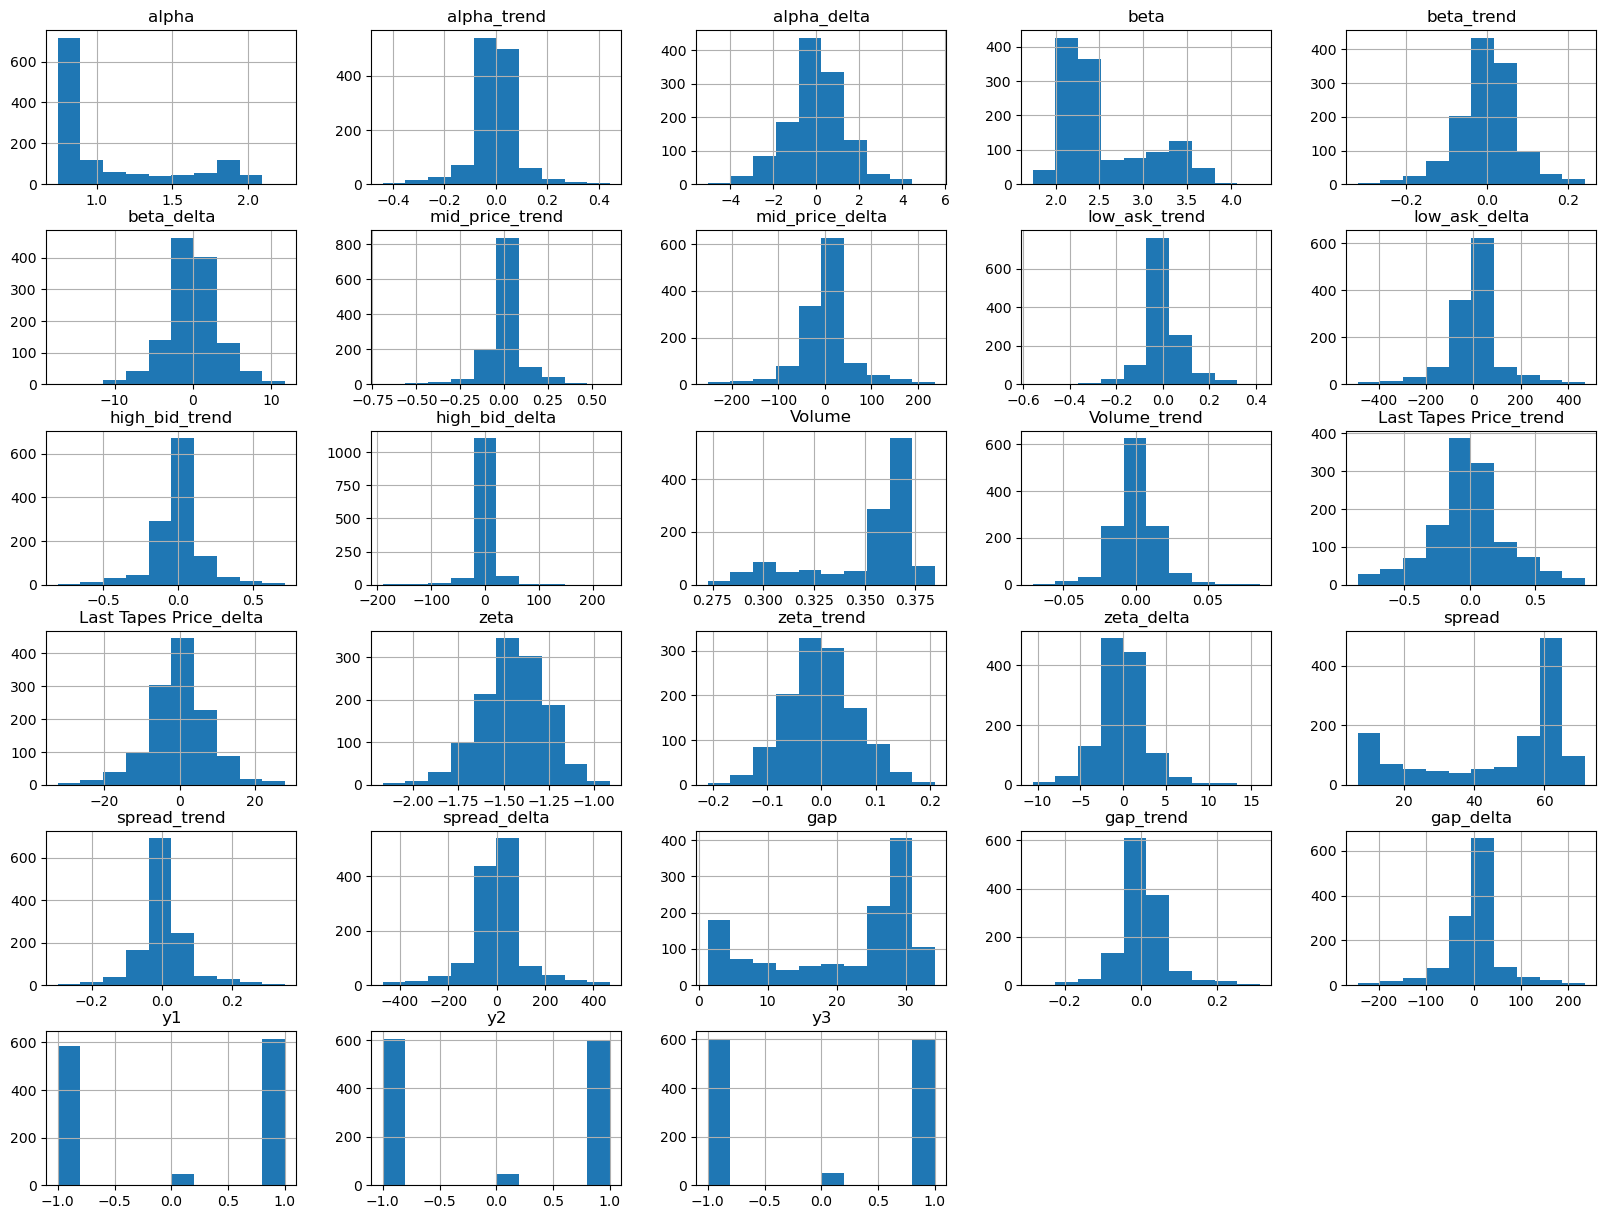

In [8]:
if "index" in list(sixty_df):
    sixty_df.drop(columns=["index"], inplace=True)
sixty_df.hist(figsize=(20,15))
plt.show()

# PCA

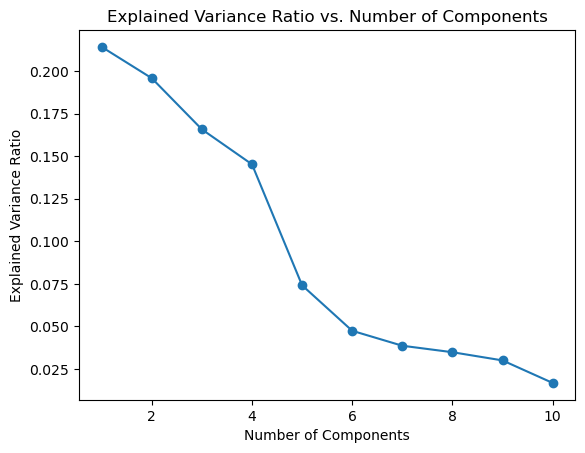

,PC1,PC2,PC3,PC4,PC5
0,-0.871914,2.287732,-1.884221,1.671466,0.058337
1,1.575387,4.091335,-0.959484,3.761828,2.220055
2,-1.467809,4.349777,-3.141831,7.735865,0.346572
3,0.761628,4.991053,-1.251119,1.469127,-1.267564
4,2.299777,3.385616,-1.037909,4.172988,2.000930
...,...,...,...,...,...
1245,-1.421730,-0.643957,-0.524850,-0.777486,-0.439917
1246,-1.386918,0.368918,3.493702,-0.731276,1.463259
1247,-1.358359,-0.829226,0.363251,1.144390,-1.850857
1248,0.049019,-1.066125,0.054856,-0.033578,0.644212


In [9]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x_feats = list(sixty_df)
x_feats.remove("y1")
x_feats.remove("y2")
x_feats.remove("y3")

# Assuming 'sixty_df' is your DataFrame
# Drop any non-numeric columns if present
x_sixty_df = sixty_df[x_feats]

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x_sixty_df)

# Define the number of components (optional)
# If not specified, it will use all components
n_components = 10  # Example: You can change this to the number of components you want

# Initialize PCA
pca = PCA(n_components=n_components)

# Fit PCA to the scaled data
pca.fit(scaled_data)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

n_components = 5
pca = PCA(n_components=n_components)
pca.fit(scaled_data)
# Transform the data onto the new feature space
pca_transformed = pca.transform(scaled_data)

# Create a DataFrame for the transformed data (optional)
pca_df = pd.DataFrame(data=pca_transformed, columns=[f"PC{i+1}" for i in range(n_components)])
pca_df


In [22]:
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(scaled_data)
# Transform the data onto the new feature space
pca_transformed = pca.transform(scaled_data)

# Create a DataFrame for the transformed data (optional)
pca_df = pd.DataFrame(data=pca_transformed, columns=[f"PC{i+1}" for i in range(n_components)])
pca_df

,PC1,PC2,PC3
0,-0.871914,2.287732,-1.884221
1,1.575387,4.091335,-0.959484
2,-1.467809,4.349777,-3.141831
3,0.761628,4.991053,-1.251119
4,2.299777,3.385616,-1.037909
...,...,...,...
1245,-1.421730,-0.643957,-0.524850
1246,-1.386918,0.368918,3.493702
1247,-1.358359,-0.829226,0.363251
1248,0.049019,-1.066125,0.054856


In [23]:
# add in the y scores
pca_df["y_1"] = sixty_df["y1"]
pca_df["y_2"] = sixty_df["y2"]
pca_df["y_3"] = sixty_df["y3"]

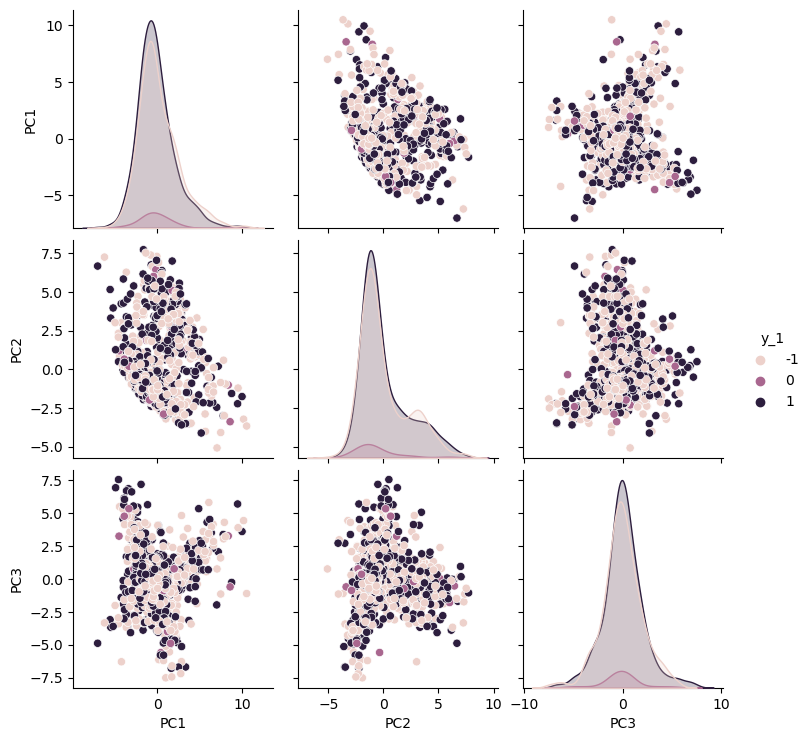

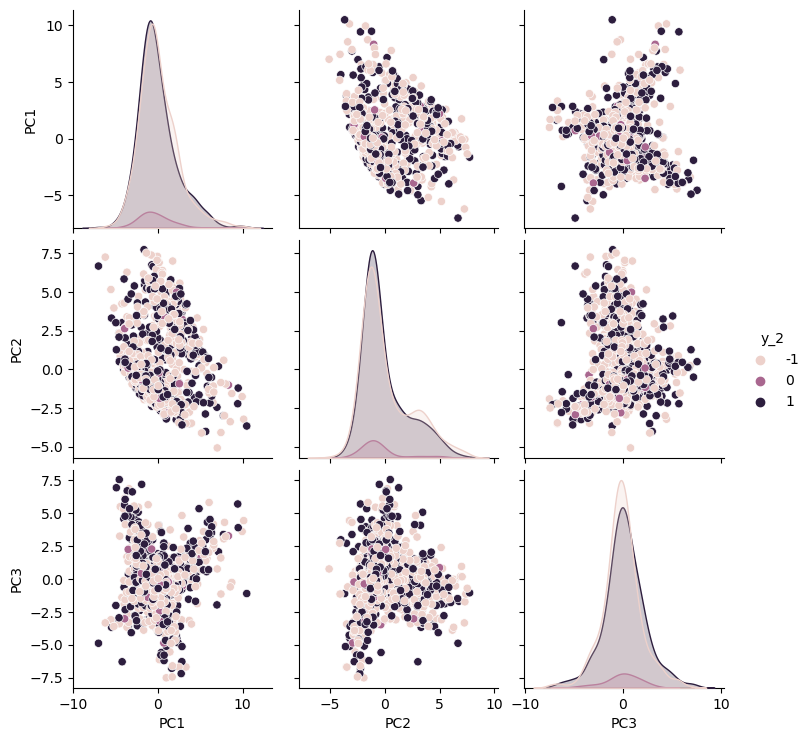

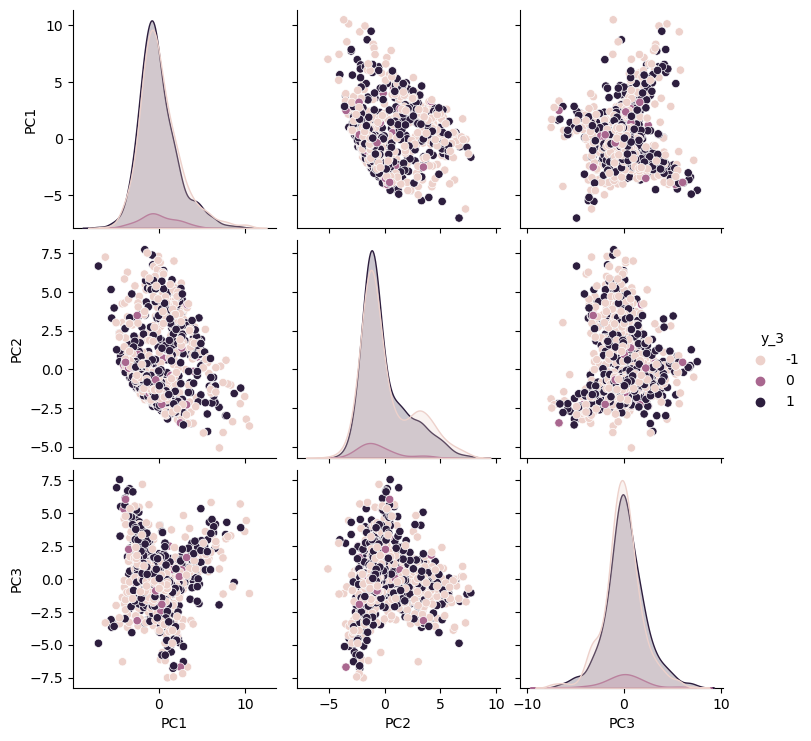

In [24]:
sns.pairplot(pca_df.drop(["y_2","y_3"],axis=1), hue="y_1", palette="muted")
sns.pairplot(pca_df.drop(["y_1","y_3"],axis=1), hue="y_2", palette="muted")
sns.pairplot(pca_df.drop(["y_1","y_2"],axis=1), hue="y_3", palette="muted")

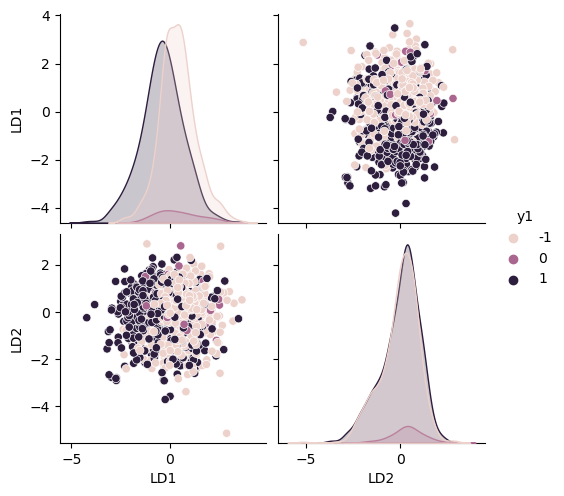

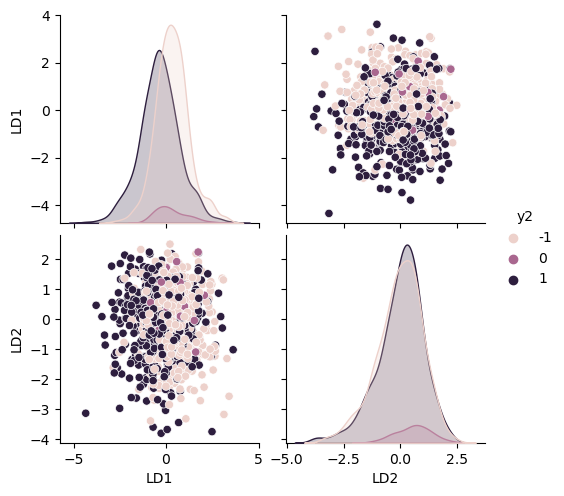

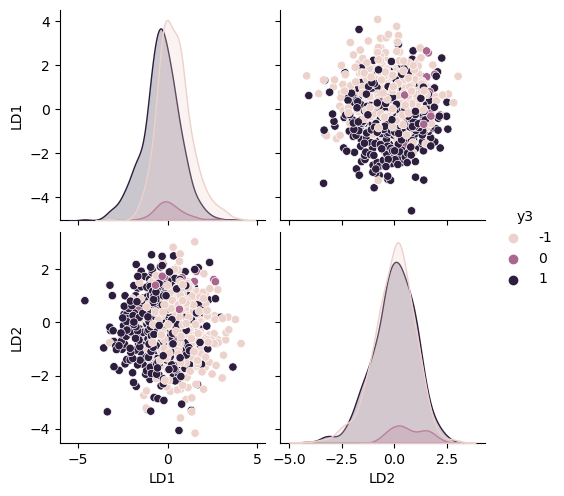

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
y_list = ["y1", "y2", "y3"]
for i in range(3):
    lda = LinearDiscriminantAnalysis(n_components=2)
    lda.fit(scaled_data, sixty_df[y_list[i]])
    lda_transformed = lda.transform(scaled_data)

    # Create a DataFrame for the transformed data (optional)
    lda_df = pd.DataFrame(data=lda_transformed, columns=[f"LD{i+1}" for i in range(n_components)])
    lda_df[y_list[i]] = sixty_df[y_list[i]]
    sns.pairplot(lda_df, hue=y_list[i], palette="muted")

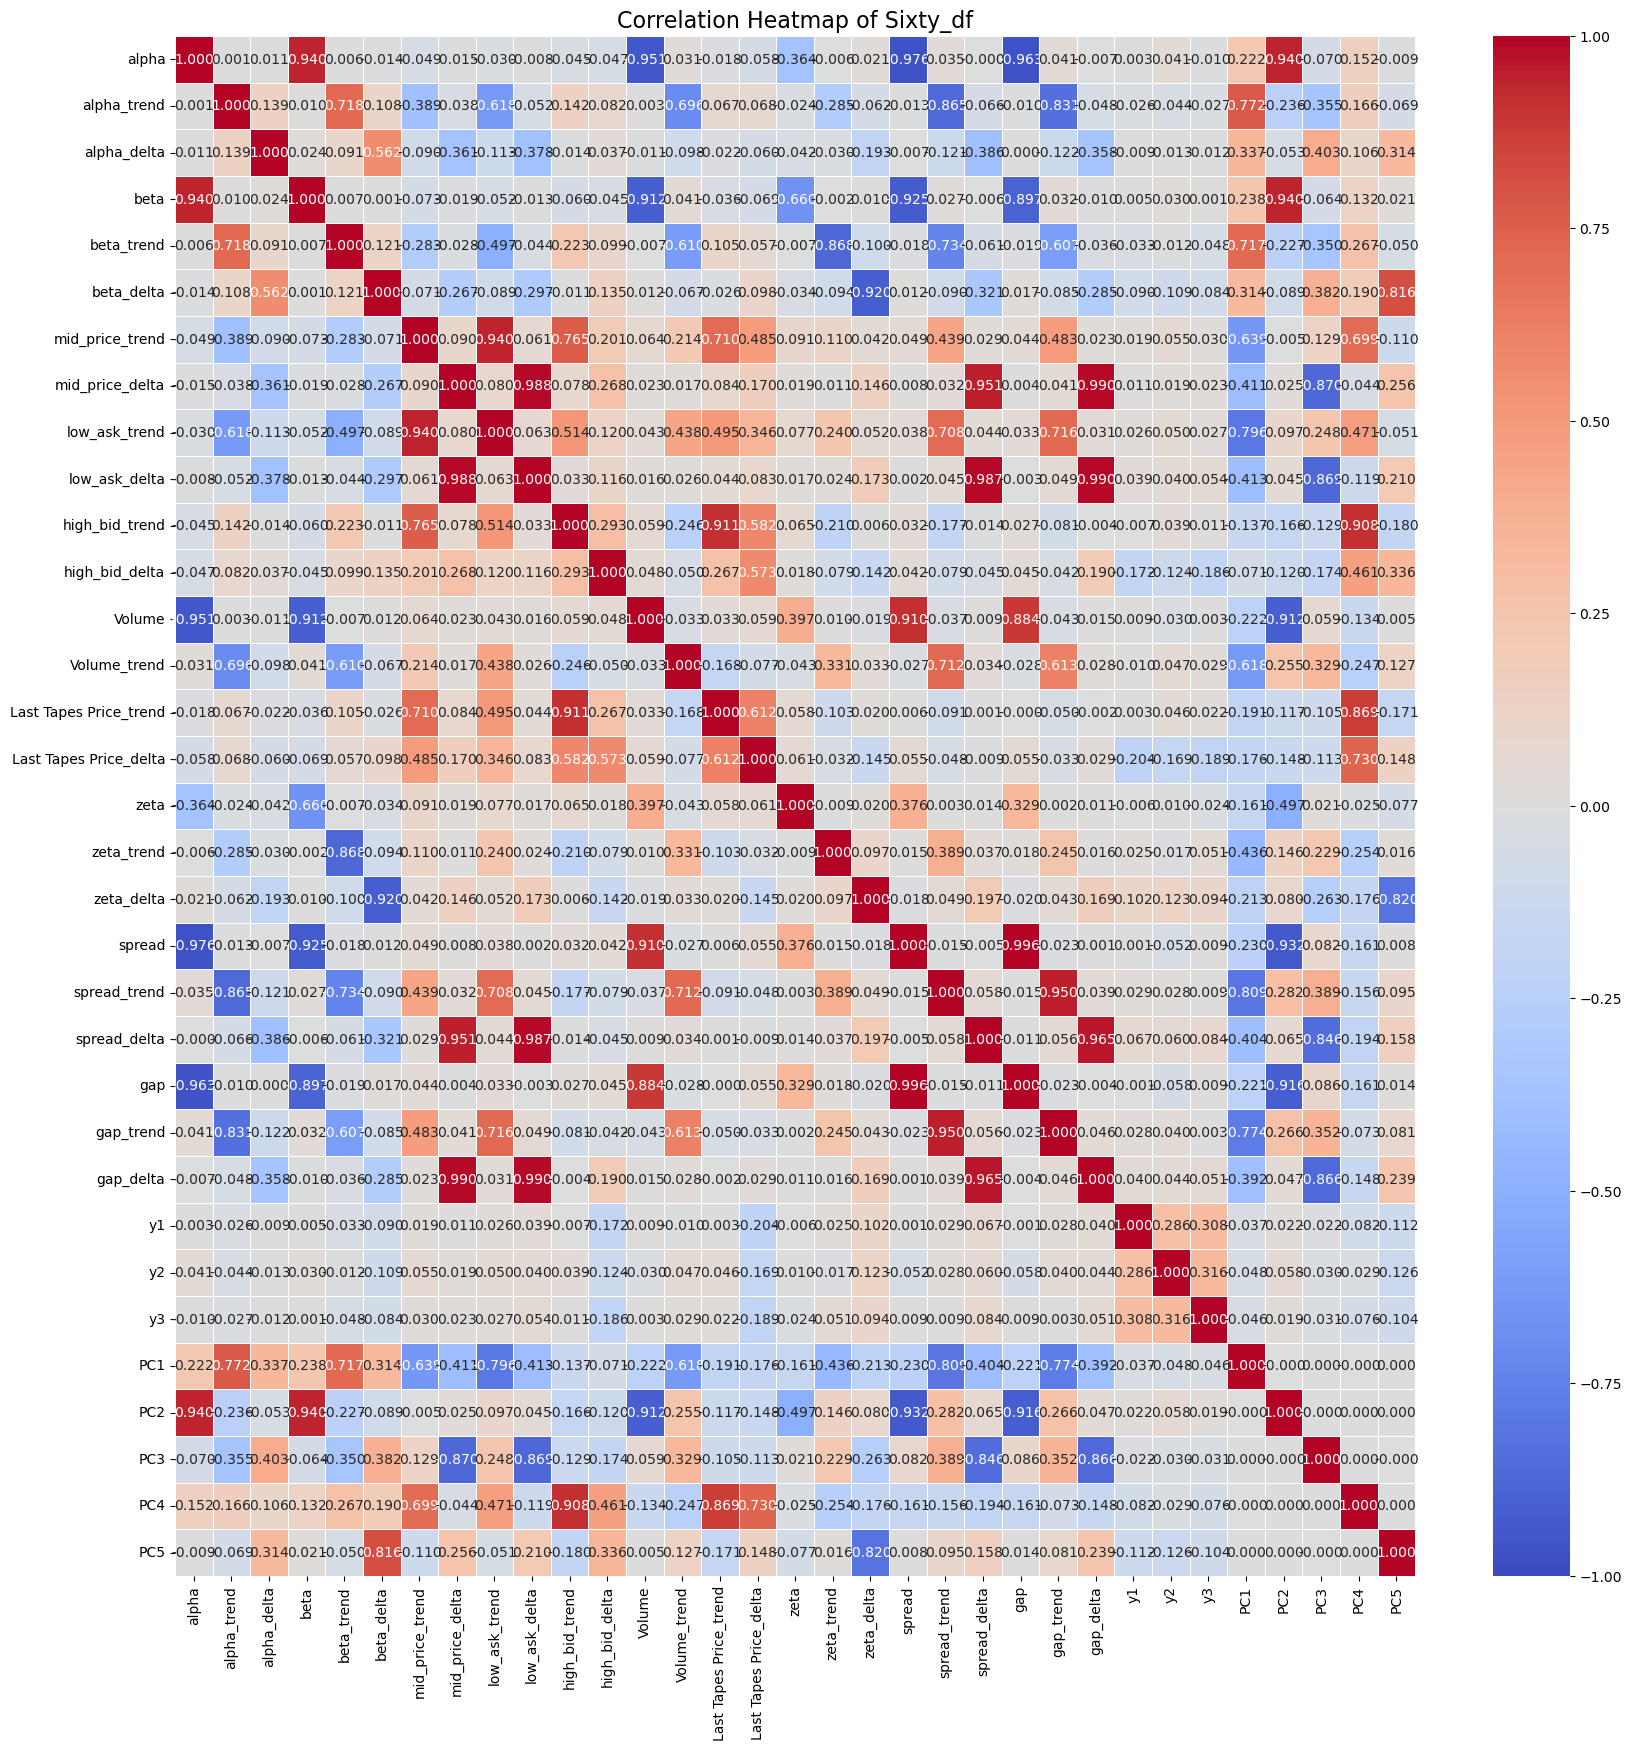

In [47]:
plt.figure(figsize=(20,20))
plt.title("Correlation Heatmap of Sixty_df", fontsize=16)

sns.heatmap(pd.concat([sixty_df, pca_df], axis = 1).corr(), annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, vmin = -1, vmax = 1)
plt.show()

# Logistic Regression

In [48]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

y_feat = "y1"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

# Create a logistic regression classifier
clf = LogisticRegression(random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 1197
Cross-Validation Scores: [0.55833333 0.62083333 0.53556485 0.50627615 0.53556485]
Mean Accuracy: 0.5513145048814505
Baseline:  0.504594820384294
Accuracy:  0.5622389306599833
              precision    recall  f1-score   support

          -1       0.52      0.56      0.54       553
           1       0.60      0.56      0.58       644

    accuracy                           0.56      1197
   macro avg       0.56      0.56      0.56      1197
weighted avg       0.56      0.56      0.56      1197



In [49]:
y_feat = "y2"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

# Create a logistic regression classifier
clf = LogisticRegression(random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 1207
Cross-Validation Scores: [0.52892562 0.51652893 0.58091286 0.58506224 0.56846473]
Mean Accuracy: 0.5559788758958885
Baseline:  0.5095277547638775
Accuracy:  0.5782932891466446
              precision    recall  f1-score   support

          -1       0.64      0.58      0.61       684
           1       0.51      0.58      0.54       523

    accuracy                           0.58      1207
   macro avg       0.58      0.58      0.58      1207
weighted avg       0.59      0.58      0.58      1207



In [50]:
y_feat = "y3"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

# Create a logistic regression classifier
clf = LogisticRegression(random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 1209
Cross-Validation Scores: [0.61157025 0.53719008 0.57438017 0.58264463 0.53526971]
Mean Accuracy: 0.568210966702102
Baseline:  0.5028949545078577
Accuracy:  0.5814722911497106
              precision    recall  f1-score   support

          -1       0.56      0.58      0.57       573
           1       0.61      0.58      0.59       636

    accuracy                           0.58      1209
   macro avg       0.58      0.58      0.58      1209
weighted avg       0.58      0.58      0.58      1209



# SVC

In [51]:
from sklearn.svm import SVC

y_feat = "y1"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))


clf = SVC(kernel='linear', random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 1197
Cross-Validation Scores: [0.53333333 0.60833333 0.54393305 0.49372385 0.51464435]
Mean Accuracy: 0.5387935843793584
Baseline:  0.504594820384294
Accuracy:  0.5622389306599833
              precision    recall  f1-score   support

          -1       0.50      0.57      0.53       521
           1       0.63      0.56      0.59       676

    accuracy                           0.56      1197
   macro avg       0.56      0.56      0.56      1197
weighted avg       0.57      0.56      0.56      1197



In [52]:
y_feat = "y2"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))


clf = SVC(kernel='linear', random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 1207
Cross-Validation Scores: [0.52479339 0.50826446 0.56846473 0.58921162 0.54356846]
Mean Accuracy: 0.5468605329035354
Baseline:  0.5095277547638775
Accuracy:  0.5782932891466446
              precision    recall  f1-score   support

          -1       0.70      0.57      0.63       754
           1       0.45      0.59      0.51       453

    accuracy                           0.58      1207
   macro avg       0.58      0.58      0.57      1207
weighted avg       0.61      0.58      0.58      1207



In [53]:
y_feat = "y3"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

clf = SVC(kernel='linear', random_state=random_state)
n_splits = 5  # You can adjust this as needed
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 1209
Cross-Validation Scores: [0.60330579 0.51652893 0.55785124 0.59917355 0.55186722]
Mean Accuracy: 0.5657453448098488
Baseline:  0.5028949545078577
Accuracy:  0.576509511993383
              precision    recall  f1-score   support

          -1       0.54      0.58      0.56       565
           1       0.61      0.57      0.59       644

    accuracy                           0.58      1209
   macro avg       0.58      0.58      0.58      1209
weighted avg       0.58      0.58      0.58      1209



# Insights


In [54]:
from sklearn.model_selection import train_test_split

y_feat = "y1"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(random_state=random_state)

clf.fit(X_train, y_train)

ypred = clf.predict(X_test)
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1-baseline))
print(accuracy_score(ypred, y_test))

# Extracting coefficients and feature names
coefficients = clf.coef_[0]
feature_names = X_train.columns

for i, c in enumerate(coefficients):
    print(feature_names[i], c)

Baseline:  0.504594820384294
0.5583333333333333
PC1 -0.034146187640893874
PC2 0.02542964877572542
PC3 -0.0279257900499813
PC4 -0.10386779032729454
PC5 -0.13943015070765952


In [55]:
y_feat = "y3"
X = pca_df[sixty_df[y_feat] != 0]
y = sixty_df[sixty_df[y_feat] != 0][y_feat]
print("Sample size", len(X))

clf = SVC(kernel='linear', random_state=random_state)

# Define the number of folds for k-fold cross-validation
n_splits = 5  # You can adjust this as needed

# Initialize k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the model on the entire dataset
clf.fit(X, y)

# Get feature importances
feature_importances = clf.coef_[0]

for i, c in enumerate(feature_importances):
    print(feature_names[i], c)

# Map feature importances to feature names if available
# Note: Since you used PCA, feature names may not be available
# If not available, you can simply use indices as feature names
# feature_names = pca_df.columns  # Assuming pca_df has column names
# Alternatively, you can use the original column names from sixty_df

# Make predictions on the entire dataset
ypred = clf.predict(X)

# Calculate baseline accuracy
baseline = np.mean(y == True)

print("Baseline: ", max(baseline, 1 - baseline))
print("Accuracy: ", np.mean(ypred == y))
print(classification_report(ypred, y))

Sample size 1209
Cross-Validation Scores: [0.60330579 0.51652893 0.55785124 0.59917355 0.55186722]
Mean Accuracy: 0.5657453448098488
PC1 -0.09189403145223807
PC2 0.03747985962264977
PC3 -0.10558144206385123
PC4 -0.20243558283569385
PC5 -0.31805425283606503
Baseline:  0.5028949545078577
Accuracy:  0.576509511993383
              precision    recall  f1-score   support

          -1       0.54      0.58      0.56       565
           1       0.61      0.57      0.59       644

    accuracy                           0.58      1209
   macro avg       0.58      0.58      0.58      1209
weighted avg       0.58      0.58      0.58      1209

